In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

import scipy.cluster.hierarchy as spc

### Topic analysis

import of df_topic

In [3]:
df_topic = pd.read_pickle("data/weibo_preprocessed/topic.pkl")
df_topic.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
mid,,,,,,,,,,,,,,,,,,,,,
3515638699605834,0.008475,0.008475,0.025424,0.008475,0.008475,0.008475,0.008475,0.008475,0.025424,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
3421815211220296,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.087302,0.007937,0.007937,...,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937


Clustering by similarity in 8 topics

In [128]:
N_TOPICS = 8

corr = df_topic.drop(columns='mid').corr().values

pdist = spc.distance.pdist(corr, metric='euclidean')
linkage = spc.linkage(pdist, method='complete',)
idx = spc.fcluster(linkage, N_TOPICS, 'maxclust')

for topic in range(N_TOPICS) :
    print(f"topic {topic} = {np.arange(0,100,1)[idx - 1 == topic]}")

topic 0 = [36 71 85]
topic 1 = [21 32 49 77]
topic 2 = [24 31 43 46 56 63 70 88 89]
topic 3 = [ 0  8 13 15 26 38 55 66 79]
topic 4 = [ 3 12 14 19 20 29 33 37 39 52 69 72 74 75 93]
topic 5 = [ 2  4 25 27 35 40 48 50 51 62 64 67 76 78 80 84 86]
topic 6 = [ 6  7  9 10 11 17 18 30 34 41 42 45 47 57 58 59 61 65 68 73 81 87 92 95
 96 97 98]
topic 7 = [ 1  5 16 22 23 28 44 53 54 60 82 83 90 91 94 99]


dendrogram of the topics clustering

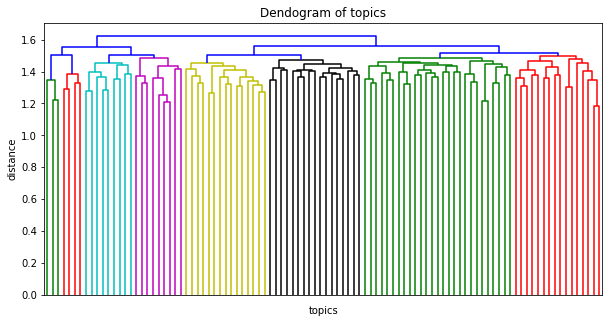

In [129]:
fig, ax = plt.subplots(1,1, figsize = (10, 5))
dn = spc.dendrogram(linkage, ax=ax, color_threshold=1.500)
ax.set_title(f"Dendogram of topics")
ax.set_xlabel('topics')
ax.set_xticklabels([])
ax.set_ylabel(f"distance")
plt.show()

Cophenetic correlation inside clusters

In [130]:
c, t = spc.cophenet(linkage,pdist)
print(f"Cophenetic correlation inside clusters : {c}")

Cophenetic correlation inside clusters : 0.6162284493434382


Correlation matrix of 100 topics

Text(0.5, 0.98, 'Correlation matrix between topics')

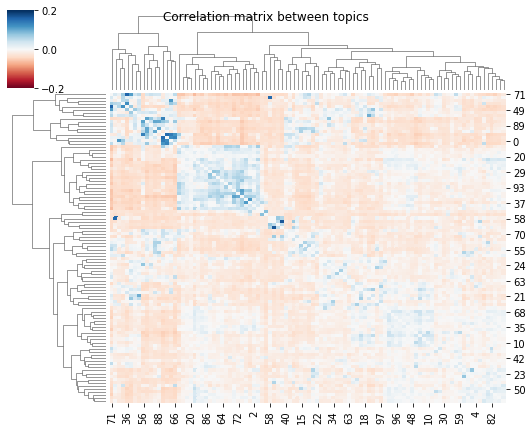

In [131]:
sns.clustermap(corr - np.identity(100), method="complete", cmap='RdBu', 
               annot_kws={"size": 7}, vmin=-0.2, vmax=0.2, figsize=(7.5,6))

plt.suptitle("Correlation matrix between topics")

In [133]:
def convert_new_topic(df_topic, idx) : 
    """
    input : df_topic, idx st idx[i] is the new topic of i
    output : df with N_TOPICS columns 
    """
    df_new = pd.DataFrame(np.zeros((df_topic.shape[0], N_TOPICS + 1)), columns=['mid'] + [str(k) for k in range(N_TOPICS)])
    df_new['mid'] = df_topic['mid']
    for i in range(100) : 
        new_i = idx[i] -1
        df_new[str(new_i)] += df_topic[str(i)]
    return df_new

df_new_topic = convert_new_topic(df_topic, idx)

df_new_topic.head(5)

,mid,0,1,2,3,4,5,6,7
0,3515638699605834,0.025424,0.050847,0.110169,0.127119,0.144068,0.161017,0.228814,0.152542
1,3421815211220296,0.023810,0.031746,0.071429,0.071429,0.150794,0.182540,0.341270,0.126984
2,3471485547472471,0.017857,0.035714,0.113095,0.065476,0.160714,0.136905,0.351190,0.119048
3,3514945709198626,0.026042,0.020833,0.067708,0.057292,0.140625,0.401042,0.171875,0.114583
4,3514766280736148,0.017045,0.034091,0.119318,0.323864,0.107955,0.107955,0.164773,0.125000


In [134]:
df_new_topic.to_pickle(f"data/weibo_preprocessed/topics_{N_TOPICS}.pkl")

### Best examples of topics

In [11]:
def create_root_content_dict() : 

    with open('data/weibo/weibodata/root_content.txt', 'r', encoding='gb18030' ) as file :
        i = 0
        d_content_roots = {}
        mid = ''
        for l in file : 
            if i % 2 == 0:
                mid = l.replace('\n', '').replace('\t', '')
            else : 
                d_content_roots[mid] = l.replace('\n', '').replace('\t', '')
            i += 1
    return d_content_roots
d_content_roots = create_root_content_dict()

In [12]:
def best_examples_topic(df_topic, topic, k) : 
    """
    Returns the first k messages having the highest probability of being in topic 
    format : 
        mid probability
        content
    """
    mids = df_topic[['mid', str(topic)]].sort_values(by = str(topic), ascending=False)[:k]
    s = ""
    for i in range(k) : 
        s_k = f"{mids.iloc[i, 0]} {mids.iloc[i, 1]} \n{d_content_roots[str(mids.iloc[i,0])]} \n"
        #print(s_k)
        s += s_k
    return s


In [ ]:
with open("data/weibo/best_3_examples_topic.txt", 'w') as file : 
    for topic in range(100) : 
        file.write(f"{topic}\n")
        file.write(best_examples_topic(df_topic, topic, 20))
        if topic % 10 == 0 : 
            print(f"{topic}%")
print(f"End")

In [28]:
topic, k = 1, 5
print(f"The {k} best examples of topic {topic} are : ")
print(best_examples_topic(df_new_topic, topic, k))

The 5 best examples of topic 1 are : 
201110330456710158 0.7252747252747253 
【在5秒钟内找到我】钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱我钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱 
3385504974698569 0.7085714285714285 
【5秒钟内找不到\"我\"的自觉转发】钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱我钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱 
2111104203607905 0.7068965517241379 
【你能在5秒钟内在钱堆里找到“我”吗？】钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱我钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱 
3382237611624165 0.7028571428571428 
【5秒钟内找不到\"我\"的自觉转发】钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱我钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱 
3515869651296239 0.5566037735849058 
买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？ 



### Interpretation of new topics

See the file topics.txt

Best examples

In [28]:
df_new_topic['2d_largest_prob'] = df_new_topic.apply(lambda row : row.nlargest(3).values[-1], axis=1)

In [122]:
def best_examples_topic2(df_topic, topic, k) : 
    """
    Returns the first k messages where the difference between the probability of being in the topic k and the second largest probability is the highest : 
        mid probability
        content
    """
    df_topic['temp'] = df_topic[str(topic)] - df_topic['2d_largest_prob']
    mids = df_topic[['mid', str(topic), 'temp']].sort_values(by = 'temp', ascending=False)[:k]
    s = ""
    for i in range(k) : 
        s_k = f"{mids.iloc[i, 0]} {mids.iloc[i, 1]} {mids.iloc[i, 2]}\n{d_content_roots[str(mids.iloc[i,0])]} \n"
        #print(s_k)
        s += s_k
    return s

#print(best_examples_topic2(df_new_topic, 0, 10))

In [25]:
with open("figures/topic_analysis/examples_topic8_2.txt", 'w', encoding='utf-8') as file : 
    for topic in range(N_TOPICS) : 
        file.write(f"{topic}\n")
        file.write(best_examples_topic2(df_new_topic, topic, 20))
print(f"End")

End


Distributions

Text(0.5, 0, 'log probability')

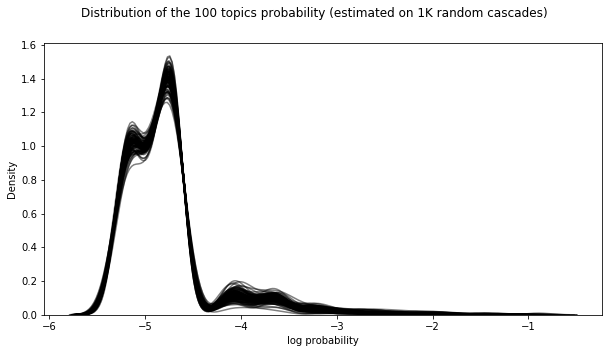

In [110]:
df = df_topic.sample(n = 1000)
fig,ax = plt.subplots(figsize = (10,5))

for i in range(100) : 
    sns.kdeplot(df[str(i)].apply(np.log), ax = ax, alpha=0.5, color='black')
fig.suptitle("Distribution of the 100 topics probability (estimated on 1K random cascades)")
ax.set_xlabel("log probability")

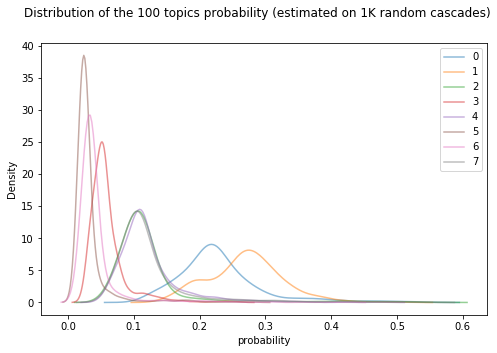

In [109]:
df = df_new_topic.sample(n = 1000)
fig,ax = plt.subplots(figsize = (8,5))

for i in range(8) : 
    sns.kdeplot(df[str(i)], ax = ax, alpha=0.5, label=str(i))
fig.suptitle("Distribution of the 100 topics probability (estimated on 1K random cascades)")
ax.set_xlabel("probability")
ax.legend()

### relation with influence

In [6]:
infos_cascades = pd.read_pickle("data/weibo_preprocessed/infos_cascades.pkl")

In [15]:
pd.Series(list(set(df_topic.index) & set(infos_cascades.mid)))

0         3424526161412099
1         3457693396238342
2         3355384296767495
3         3335384881168396
4         3363745906556941
                ...       
232839    3356241750392819
232840    3479311074459637
232841    3374578024316918
232842    3366581873147895
232843    3506231220109305
Length: 232844, dtype: int64

In [17]:
df = df_topic

df = df.merge(infos_cascades, right_on='mid', left_on = df.index)
df = df.drop(columns=['date','User1','users2','mid'])

df['#likes'] = df['#likes'].apply(lambda x : np.log(1 + x))
df['#reposts'] = df['#reposts'].apply(lambda x : np.log(1 + x))

corr = df.corr() - np.identity(102)

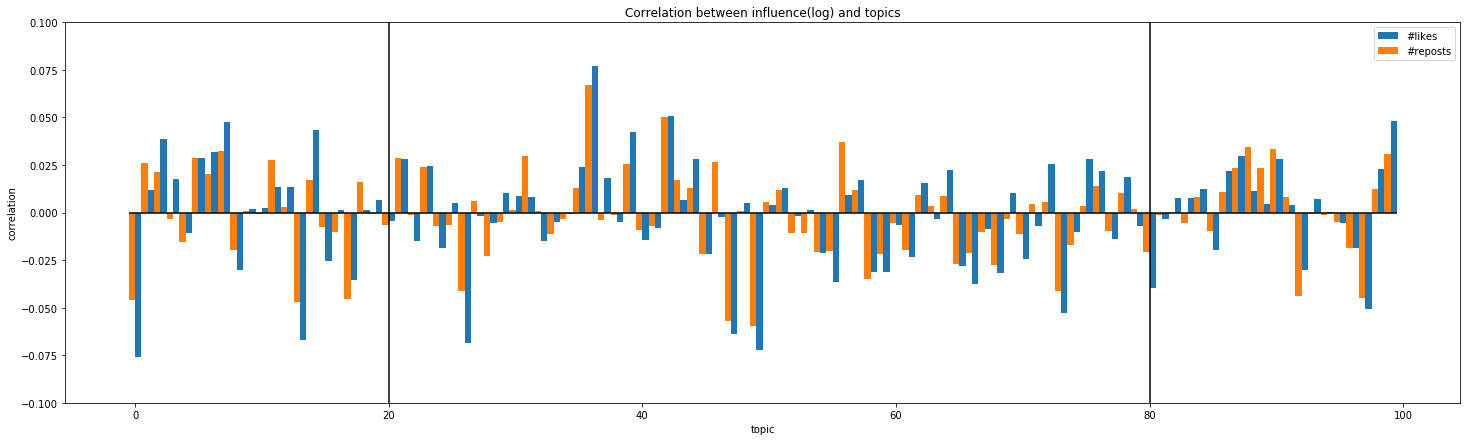

In [31]:
corr2 = corr.sort_values(by='#likes')
corr_likes = corr2['#likes'].drop(['#reposts','#likes'])
corr_infl = corr2['#reposts'].drop(['#reposts','#likes'])

fig, ax = plt.subplots(figsize = (25,7))

ax.bar(corr_likes.index, corr_likes, label='#likes', align='edge', width = 0.5)
ax.bar(corr_likes.index, corr_infl, label='#reposts', align='edge', width = -0.5)

ax.set_xlabel('topic')
ax.set_ylabel('correlation')
ax.set_title('Correlation between influence(log) and topics')
ax.hlines(y=0., xmin=-0.5, xmax=99.5)
ax.vlines(x = 20, ymin=-0.1, ymax = 0.1)
ax.vlines(x = 80, ymin=-0.1, ymax = 0.1)
ax.set_ylim(-0.1,0.1)
ax.legend()
plt.show()

In [36]:
low_cluster = corr_infl.index[:20]
mid_cluster = corr_infl.index[20:80]
high_cluster = corr_infl.index[80:]

print("LOW = " + str(list(low_cluster)) ) 
print("MID = " + str(list(mid_cluster)) ) 
print("HIGH = " + str(list(high_cluster)) ) 

LOW = [0, 49, 26, 13, 47, 73, 97, 80, 66, 55, 17, 68, 58, 59, 8, 92, 65, 15, 70, 61]
MID = [45, 54, 85, 24, 96, 22, 32, 40, 77, 4, 74, 67, 41, 79, 71, 60, 95, 28, 38, 33, 20, 81, 63, 46, 27, 52, 34, 94, 18, 16, 53, 9, 10, 50, 91, 89, 48, 25, 19, 43, 93, 82, 83, 31, 30, 56, 69, 29, 88, 1, 84, 51, 12, 11, 62, 57, 3, 37, 78, 76]
HIGH = [86, 64, 98, 35, 23, 72, 44, 21, 75, 90, 5, 87, 6, 2, 39, 14, 7, 99, 42, 36]


    LOW = [0, 49, 26, 13, 47, 73, 97, 80, 66, 55, 17, 68, 58, 59, 8, 92, 65, 15, 70, 61]
    MID = [45, 54, 85, 24, 96, 22, 32, 40, 77, 4, 74, 67, 41, 79, 71, 60, 95, 28, 38, 33, 20, 81, 63, 46, 27, 52, 34, 94, 18, 16, 53, 9, 10, 50, 91, 89, 48, 25, 19, 43, 93, 82, 83, 31, 30, 56, 69, 29, 88, 1, 84, 51, 12, 11, 62, 57, 3, 37, 78, 76]
    HIGH = [86, 64, 98, 35, 23, 72, 44, 21, 75, 90, 5, 87, 6, 2, 39, 14, 7, 99, 42, 36]

In [124]:
idx = [1] * 100
for i in low_cluster : 
    idx[int(i)] = 0
for i in high_cluster :
    idx[int(i)] = 2

df_topic3 = convert_new_topic(df_topic, idx)


KeyError: '-1'

end